In [2]:
# prompt: install numpy, pandas, seaborn

!pip install numpy
!pip install pandas
!pip install seaborn

In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [5]:
import pandas as pd

# Define the URL
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the dataset directly from the URL
data = pd.read_csv(URL1)

# Display the first few rows
data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
import pandas as pd

# URL of the second dataset
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Load the CSV into DataFrame
X = pd.read_csv(URL2)

# Display first few rows
X.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
# TASK 1: Create a NumPy array from the 'Class' column
Y = data['Class'].to_numpy()


In [8]:
from sklearn import preprocessing

# Provided transform
transform = preprocessing.StandardScaler()

# Standardize the data in X and reassign it to X
X = transform.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)


In [10]:
Y_test.shape

(18,)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Define parameter grid
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}  # Ridge regression

# Step 2: Create logistic regression object
lr = LogisticRegression()

# Step 3: Create GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Step 4: Fit the model
logreg_cv.fit(X_train, Y_train)

# Step 5: Output the best parameters and best score
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8357142857142857


In [12]:
# Evaluate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.7222222222222222


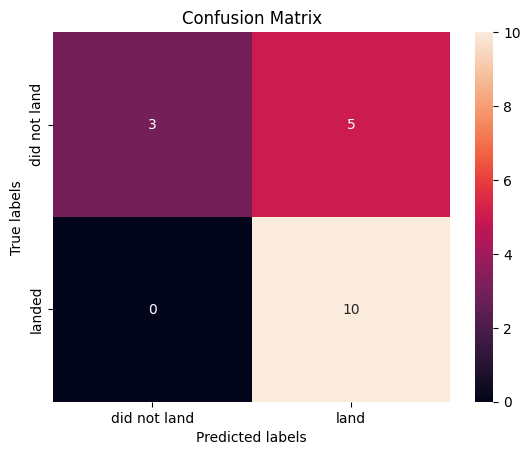

In [13]:
#Confusion matrix
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),  # removed duplicate 'rbf'
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create the SVM object
svm = SVC()

# Create the GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Fit the grid search object to the training data
svm_cv.fit(X_train, Y_train)

# Print the best parameters and best accuracy score from cross-validation
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation accuracy:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best cross-validation accuracy: 0.8625


In [19]:
# Calculate and print accuracy on test data
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.7777777777777778


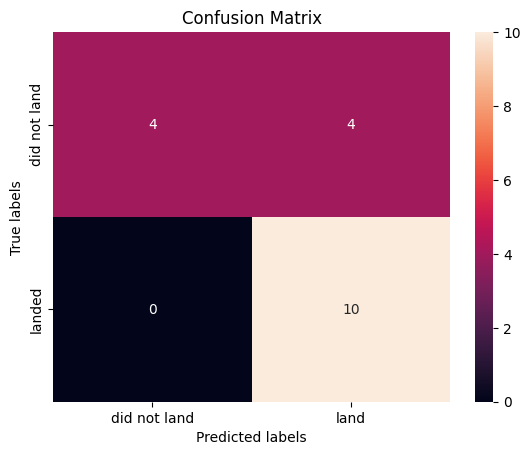

In [20]:
#Confusion Matrix
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Example dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid with valid 'max_features' values
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],  # 2,4,...,18
    'max_features': ['sqrt', 'log2', None],      # Removed 'auto'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Tuned hyperparameters (best parameters) :", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy :", accuracy)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Tuned hyperparameters (best parameters) : {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Test set accuracy : 1.0


In [30]:
# Fit the GridSearchCV on training data first
tree_cv.fit(X_train, y_train)

# Now calculate accuracy on the test set
accuracy = tree_cv.score(X_test, y_test)
print("Test accuracy:", accuracy)


Fitting 10 folds for each of 972 candidates, totalling 9720 fits
Test accuracy: 1.0


In [32]:
print(len(X_test))   # Should match predictions length
print(len(y_test))   # True test labels length
print(len(Y_test))   # Check if this is defined, or if you meant y_test


30
30
18


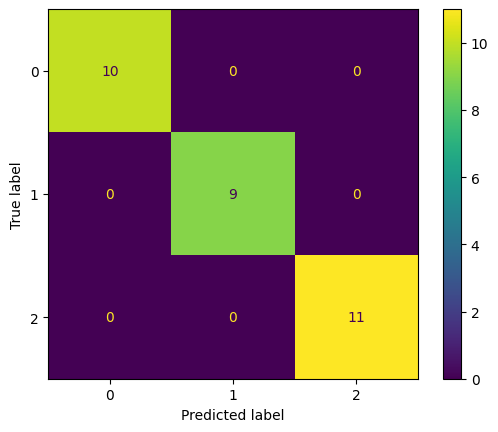

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters dictionary
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create KNN object
KNN = KNeighborsClassifier()

# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit GridSearchCV on training data (make sure you have X_train, y_train)
knn_cv.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best accuracy:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2}
Best accuracy: 0.9583333333333333


In [38]:
# Calculate accuracy on the test data
accuracy_test = knn_cv.score(X_test, y_test)
print("Test accuracy:", accuracy_test)


Test accuracy: 1.0


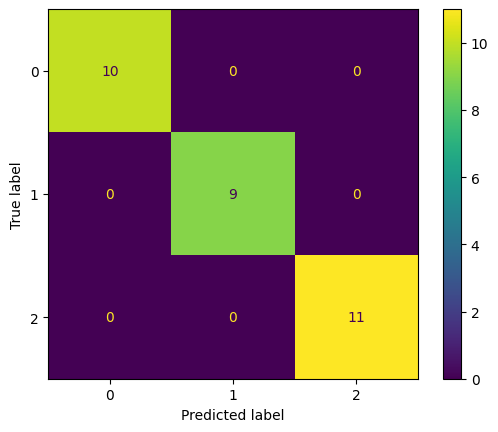

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [47]:
# Evaluate Decision Tree
tree_acc = tree_cv.score(X_test, y_test)
print("Decision Tree Test Accuracy:", tree_acc)

# Evaluate KNN
knn_acc = knn_cv.score(X_test, y_test)
print("KNN Test Accuracy:", knn_acc)

# Compare
if tree_acc > knn_acc:
    print("✅ Best model: Decision Tree")
elif knn_acc > tree_acc:
    print("✅ Best model: KNN")
else:
    print("🤝 Both models perform equally well.")


Decision Tree Test Accuracy: 1.0
KNN Test Accuracy: 1.0
🤝 Both models perform equally well.
